<IPython.core.display.Javascript object>


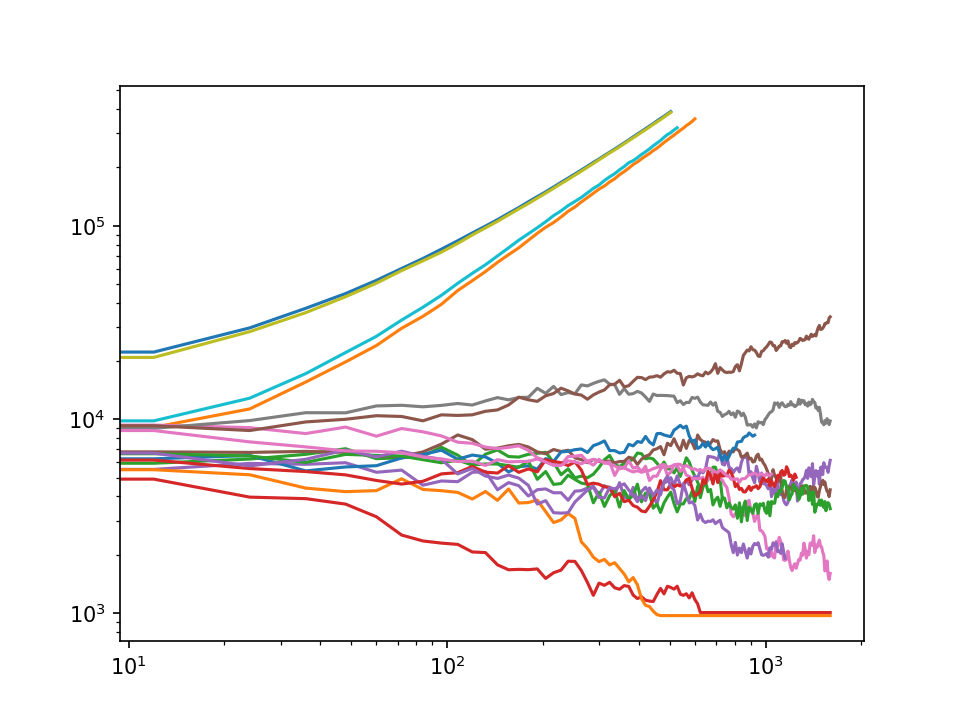

tag1 time_s time11 pop_s population ratio_s PPratio space_s w2 h2 w h rule_s rulespace rulestr x sumpop
soup time 732 pop 3896 ratio 0.7 space 1600 30 1815 816 rule lifelib r3b14t17s14t23 sumpop 4324860 
soup time 1596 pop 6146 ratio 1.2 space 1600 30 1541 299 rule lifelib r3b14t19s14t23 sumpop 7977060 
soup time 1596 pop 4328 ratio 0.6 space 1600 30 1653 713 rule lifelib r3b14t20s14t23 sumpop 9583020 
soup time 1596 pop 9809 ratio 0.9 space 1600 30 1774 457 rule lifelib r3b14t22s14t23 sumpop 19029264 
soup time 924 pop 8295 ratio 1.0 space 1600 30 1611 804 rule lifelib r3b14t17s14t23 sumpop 6746772 
soup time 1596 pop 3461 ratio 1.0 space 1600 30 1591 393 rule lifelib r3b14t19s14t23 sumpop 6753036 
soup time 1248 pop 5022 ratio 1.2 space 1600 30 1636 803 rule lifelib r3b14t20s14t23 sumpop 6095856 
soup time 1152 pop 1919 ratio 0.5 space 1600 30 1368 802 rule lifelib r3b14t21s14t23 sumpop 4143480 
soup time 1044 pop 5220 ratio 0.9 space 1600 30 2171 806 rule lifelib b3s23 sumpop 603910

In [3]:
#program version 340

################ tunable parameters

input_file1='default.rules.csv'
# input_file1='borderline1.rules.csv'
input_file1='input-borderline1.rules.csv'
input_file1='input-borderline1-Copy1.rules.csv'
input_file1='input-ltl-r2-2.rules.csv'
# input_file1='input-ltl-r2-12.rules.csv'
# input_file1='input-ltl-r2-18.rules.csv'
input_file1='input-ltl-r3-01.rules.csv'
input_file1='input/aselftest317-ltl-r3-08.rules.csv'
input_file1='input/aselftest340-ltl-r3-08.rules.csv'
# input_file1='input/input-ltl-r3-16.rules.csv'
# input_file1='input/input-ltl-r3-03-Copy1.rules.csv'

output_file1='output-2.rules.csv'
output_file1='output-borderline1-2.rules.csv'
output_file1='output-ltl-r2-02.rules.csv'
output_file1='output/output-ltl-r3-0.rules.csv'
output_file1='output/output-ltl-r3-1.rules.csv'
output_file1='output/fromcsv-ltl-r3-2.rules.csv'

#unit1=100#1250#600#1500#800#900#400#200#100#50#1000#256#128
##wt=1800##3000#2400#1800#1500#1200#900#700
w2=1600#800#200#500#400#200#100#50#1000#256#128#16#25
h2=30#w2#16
#maxtime=4*unit1 #*2
maxtime=w2#*2 #*4#*2
halftime=maxtime//2
##niter =wt#600#500#400#300#6##1000#500###800 # #1500
hthreshold=800#400:#200:#100:

step1=12 #4 #20 #8 #15 #5 #1 #37 #2
#step2=120#12#60 #120 #1


#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################



from __future__ import print_function

%matplotlib notebook
##%matplotlib inline
from matplotlib import pyplot as plt

import math
import lifelib


###################

plt.figure()

##plt.yscale('log')
plt.loglog()

plt.ion()
##plt.ioff()

###################


with open(output_file1,'a') as f1:
    print( file=f1)


#schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,x,sumpop'
print(schema1.replace(',',' '))

###################
##############
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#######
# in p1
# out p1, fPPratio
def test_rule():
    global p1, fPPratio
    
    ###pass

    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    #####p1 = p1[niter]

    population_niter = None
    sumpopeverygen=0
    
    ##currgen = 0
    ##for _ in range(int(niter/step2)):
    for currgen in range(0,  maxtime, step1):
        
        ####
        
        p1=p1[step1]
        
        ####
        sumpopeverygen += p1.population * step1
        
        if sumpopeverygen> 100e6:#500e6:
            break ###
        
        ####
        
        if currgen//step1 == halftime//step1:
            population=p1.population ;  population_niter = population


        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
        
        if h> hthreshold:#400:#200:#100:
            break ###
        
            
#     !free -m

    #######################################

    plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
#     plt.plot(gens, ys)
    plt.show()

    
    #######################################

    #print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)

    #######################################

    #####p1 = p1[niter]

    #######################################

    bb=p1.bounding_box
    #print(bb)

    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=currgen  ###  maxtime
    pop_s='pop'
    population=p1.population ;  population_2niter = population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    ratio_s='ratio'
    ######fPPratio= population_2niter/population_niter
    #######fPPratio= population_2niter/(population_niter+1)
    fPPratio= population_2niter/(pops[currgen//step1//2]+1)
    PPratio= '{:.1f}'.format(fPPratio)
    #log2PP= '{:.1f}'.format(math.log2(fPPratio) )

    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1)
#     print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    if fPPratio<1.6 and h>250  :
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    with open(output_file1,'a') as f1:
        #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, file=f1)
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,  'sumpop' , sumpopeverygen,    rest1, file=f1)
   
    #####################################
    ##del p1
    ##del lt
    ##del sess
    #!free -m
    
    return

#end def test_rule
###################
##############
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#######


    
def test_8_rules(list8)    :
    global p1, rulestr
    ###rulestrlist=[  'r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)  for   bmax in range(bmax0, bmax0+ndbs)  ]#
    rulestrlist=[ cut_rulestr_from_str(x)   for  x in list8 ]#

    try:
        #sess = lifelib.load_rules(rulestr)
        sess = lifelib.load_rules(*rulestrlist)
        #1/0
    except:
        exc_info1=sys.exc_info()
        #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
        print("error:", exc_info1[0], exc_info1[1])
        #raise
        #continue
        return
    
    ###################
 
    lt = sess.lifetree()

    for rulestr in rulestrlist:
        
        p1=lt.pattern(rule=rulestr)
        p=0.3###08#02#05 #1#2#3#4#5 
        p1[0:h2, 0:w2] = p

        ################################
        test_rule()
        ################################
        
#     /print rulestrlist

    return
    

#############################################################################3###################
    
    
def cut_rulestr_from_str(str1):
    sp5=str1.split()
    #print(sp5)
    i5=sp5.index('lifelib')
    rulestr=sp5[i5+1]
    #print(rulestr)
    return rulestr


##############
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#############################################################################3###################
#######

with open(input_file1) as f0:
    input1=f0.read()

sp0=input1.splitlines()


#################3

    
space1=' '
#rest1=space1.join(sp5[i5+2:])
rest1=''
#print(rest1)


p1=None
rulestr=None
fPPratio=None

list1=sp0
while list1:
#     /print len(list1)
    if len(list1)>=8:
        smalllist=list1[:8]
        list1=list1[8:]
    else:
        smalllist=list1
        list1=[]
    test_8_rules(smalllist)
    
    
    
    
###break


###################

#for dbs in range(-ndbs,ndbs+1):
##for dbs in range(-1,2):
##for dbmax in range(ndbmax):

    #bmin=bmin0#+dbs
    #bmax=bmax0+dbs
    #smin=smin0#+dbs
    #smax=smax0#+dbs

    #rulestr='b3s23'
    #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
    #rulestr='b{}s23'.format(bmax)
    ######rulestr='r1b3t{}s3t4'.format(bmax)
    ##rulestr='r2b7t12s7t10'.format(bmax)
    #rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)
    
    
    
!free -m

# if fPPratio < 1.5:
#     p1.viewer()


In [6]:
p1.population
fPPratio

0.9484699769053118

In [1]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1353        1883          28        1193        2788
Swap:           759          23         735
 1858 martin    20   0  517168  81932  13788 S  0,0  1,8   2:31.63 jupyter-not+
 8875 martin    20   0  618900  43756  13436 S  0,0  1,0   0:00.74 python3
23139 martin    20   0 1091208 211336  27112 S  0,0  4,7   0:02.15 python3
23165 martin    20   0   52680  12892   7344 S  0,0  0,3   0:00.02 python3
23170 martin    20   0   52680  12868   7320 S  0,0  0,3   0:00.01 python3
23175 martin    20   0   52680  12868   7320 S  0,0  0,3   0:00.00 python3
23180 martin    20   0   52680  12888   7344 S  0,0  0,3   0:00.00 python3
23185 martin    20   0   52680  12892   7344 S  0,0  0,3   0:00.00 python3
25422 martin    20   0  624712  43548  13640 S  0,0  1,0   0:00.11 python3


In [35]:
#
import sys

try:
    sess = lifelib.load_rules('sffdsdfsfd')
    #1/0
except:
    exc_info1=sys.exc_info()
    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
    print("error:", exc_info1[0], exc_info1[1])
    #raise

Generating code for rules ['sffdsdfsfd']...
error: <class 'ValueError'> Rule "sffdsdfsfd" does not belong to any genus


In [25]:
math.exp(0.7*math.log(2))

1.624504792712471